# Segmentation on the raw data based on the gender and the total amount spent.

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the raw data csv and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data/raw", "retail_sales_dataset.csv")

retail_df = pd.read_csv(relative_path)
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
retail_df_copy = retail_df.copy()

# drop the columns that can cause colinearity and other irrelevant columns
retail_df_copy = retail_df_copy.drop(['Quantity', 'Price per Unit', 'Transaction ID', 'Date', 'Customer ID', 'Product Category','Age'], axis=1)

retail_df_copy

,Gender,Total Amount
0,Male,150
1,Female,1000
2,Male,30
3,Male,500
4,Male,100
...,...,...
995,Male,50
996,Male,90
997,Female,100
998,Female,150


In [6]:
# One-hot encoding for Gender
encoder = OneHotEncoder()
encoded = encoder.fit_transform(retail_df_copy[['Gender']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
encoded_df 

,Gender_Female,Gender_Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
995,0.0,1.0
996,0.0,1.0
997,1.0,0.0
998,1.0,0.0


In [7]:
# Combine one-hot encoded with numerical columns

X = pd.concat([retail_df_copy[['Total Amount']], encoded_df], axis=1)
X

,Total Amount,Gender_Female,Gender_Male
0,150,0.0,1.0
1,1000,1.0,0.0
2,30,0.0,1.0
3,500,0.0,1.0
4,100,0.0,1.0
...,...,...,...
995,50,0.0,1.0
996,90,0.0,1.0
997,100,1.0,0.0
998,150,1.0,0.0


In [10]:
# Scale the X variables using Standard Scaler

scaler = StandardScaler()
X[[ 'Total Amount','Gender_Female','Gender_Male']] = scaler.fit_transform(X[['Total Amount', 'Gender_Female', 'Gender_Male']])
X

,Total Amount,Gender_Female,Gender_Male
0,-0.546704,-1.020204,1.020204
1,0.971919,0.980196,-0.980196
2,-0.761098,-1.020204,1.020204
3,0.078611,-1.020204,1.020204
4,-0.636035,-1.020204,1.020204
...,...,...,...
995,-0.725366,-1.020204,1.020204
996,-0.653901,-1.020204,1.020204
997,-0.636035,0.980196,-0.980196
998,-0.546704,0.980196,-0.980196


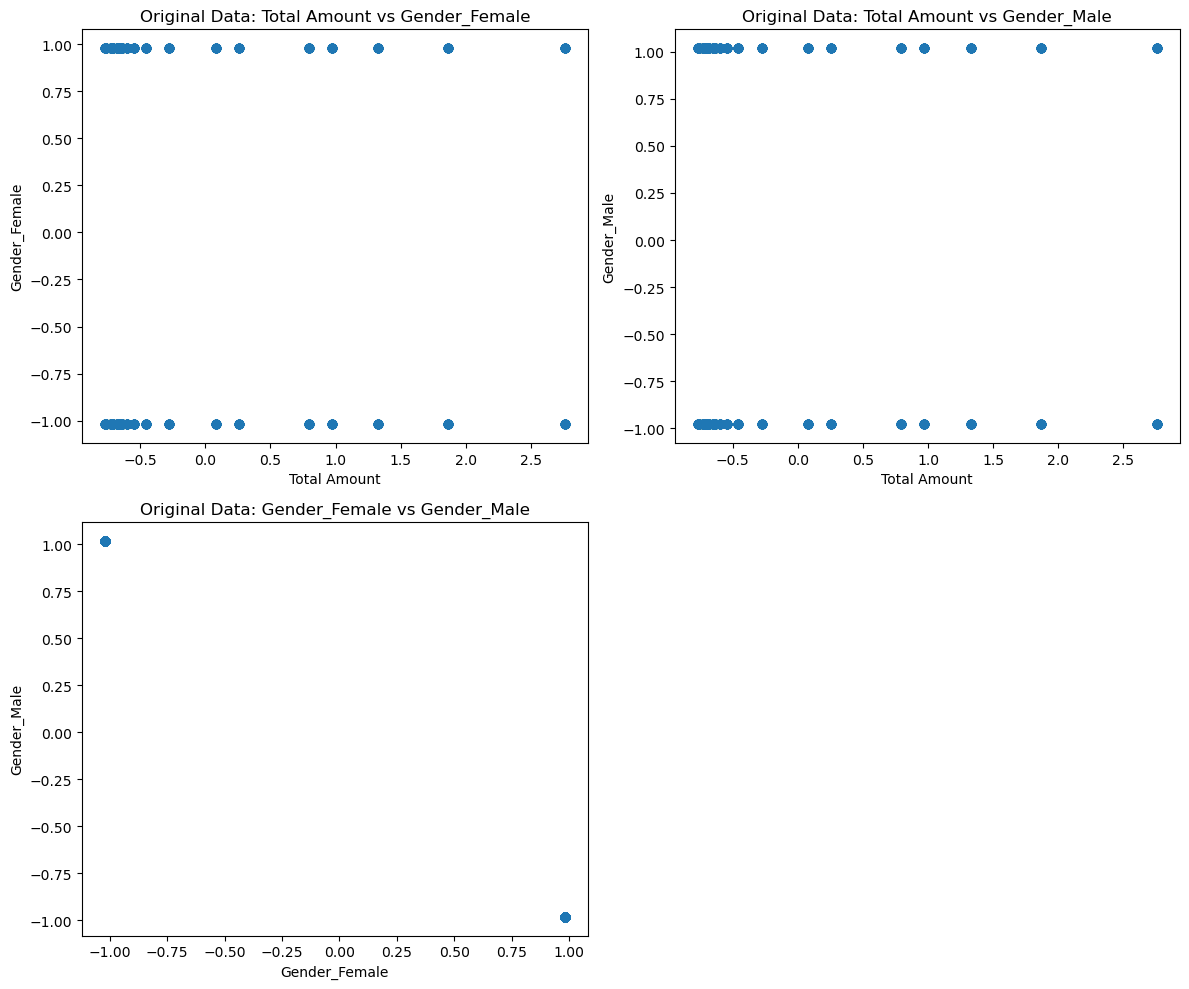

In [11]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = X.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(X, feature_names, title_prefix='Original Data: ')

In [12]:

# Initialize the K-means model
kmeans = KMeans(n_clusters=2, random_state=123, n_init=10)

# Fit the model
clusters= kmeans.fit(X)


# Create a copy for clustering and modifictaions
X = X.copy()

# Assign cluster labels to the original data as a new column
X["Cluster"] = clusters.labels_
print(X)

     Total Amount  Gender_Female  Gender_Male  Cluster
0       -0.546704      -1.020204     1.020204        0
1        0.971919       0.980196    -0.980196        1
2       -0.761098      -1.020204     1.020204        0
3        0.078611      -1.020204     1.020204        0
4       -0.636035      -1.020204     1.020204        0
..            ...            ...          ...      ...
995     -0.725366      -1.020204     1.020204        0
996     -0.653901      -1.020204     1.020204        0
997     -0.636035       0.980196    -0.980196        1
998     -0.546704       0.980196    -0.980196        1
999     -0.600303      -1.020204     1.020204        0

[1000 rows x 4 columns]


c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


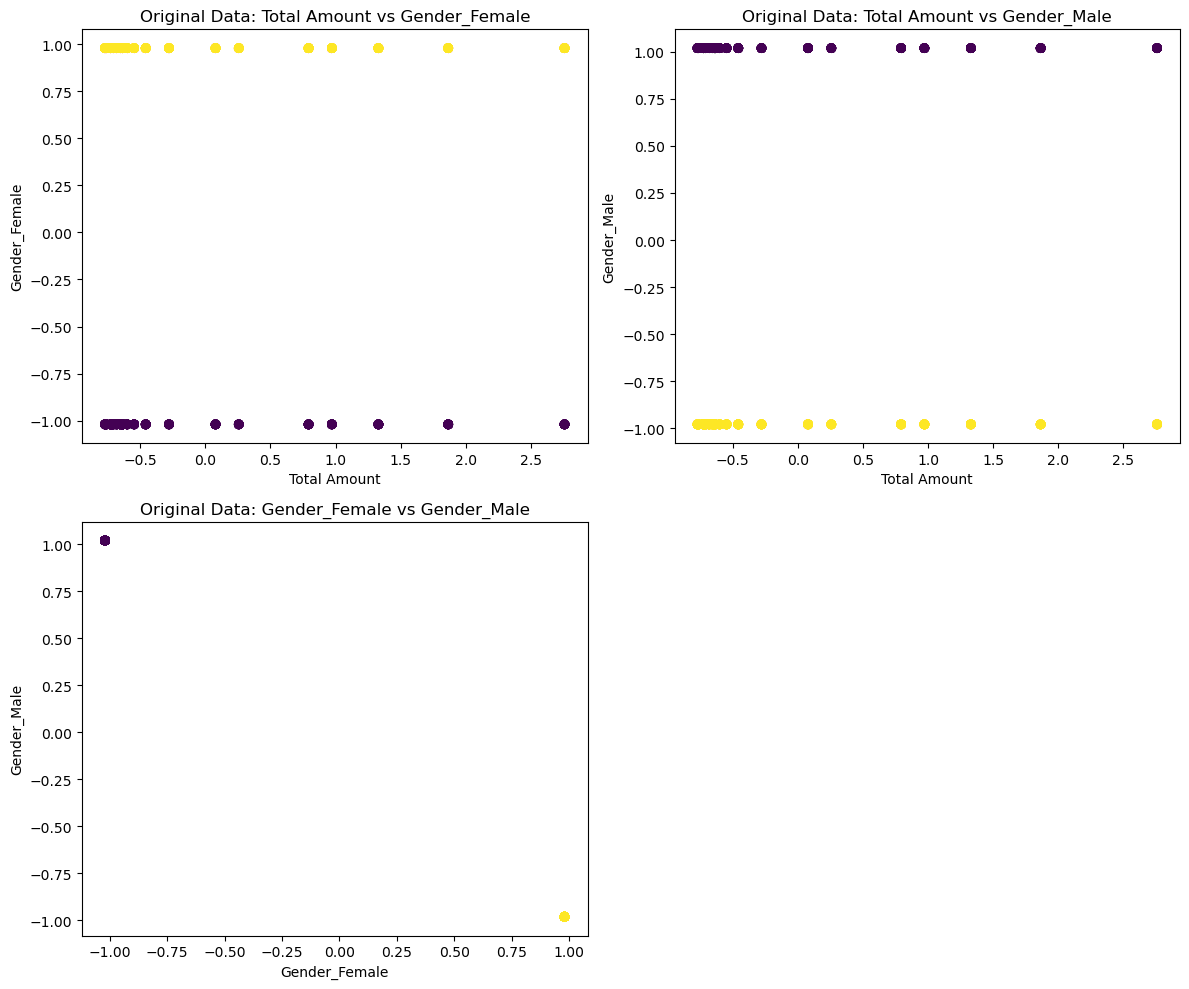

In [ ]:
# Use the helper function to plot scatter plots with coloring by cluster labels (2D)
plot_feature_pairs(X, feature_names, color_labels=X['Cluster'], title_prefix='Original Data: ')

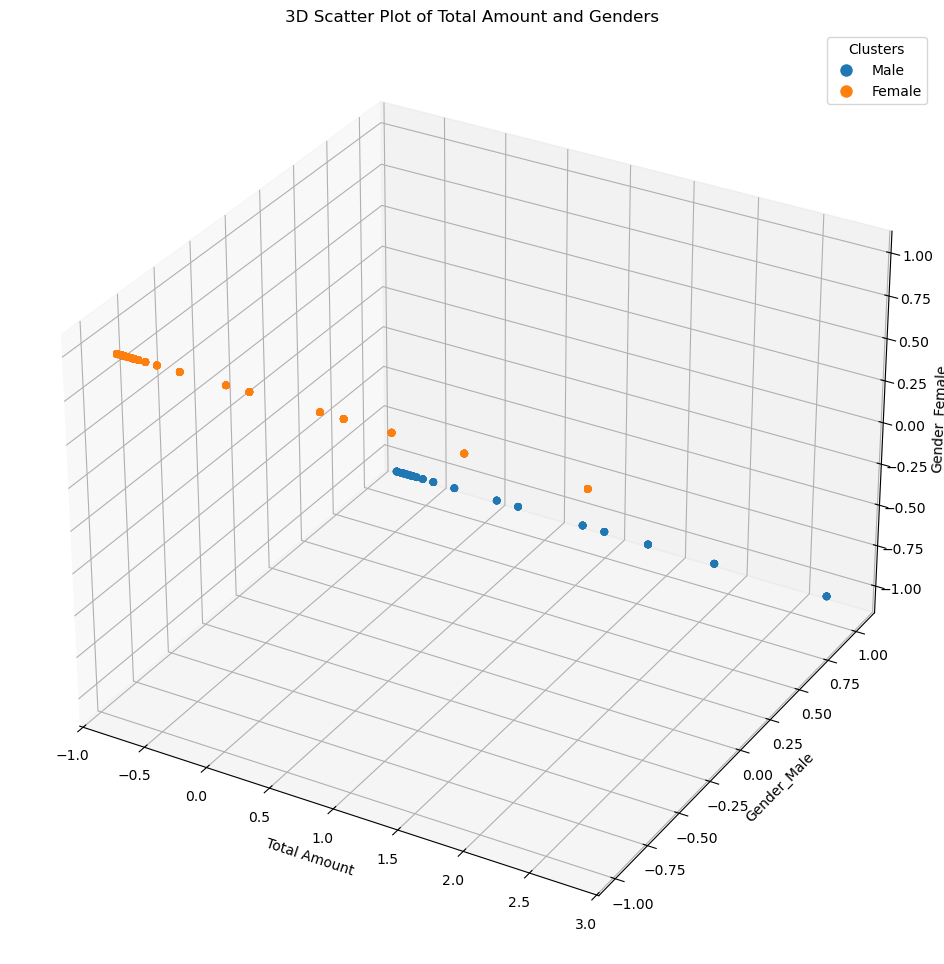

In [24]:
# 3D plot 
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

# Define custom labels for gender clusters
gender_labels = {0: "Male", 1: "Female"}


# Create mapping between values and colors
labels = X["Cluster"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}



# Create a 3D plot
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(X['Total Amount'], X['Gender_Male'], X['Gender_Female'], 
                  c=X['Cluster'].map(color_map), marker='o')

# Add axis labels
ax.set_xlabel('Total Amount')
ax.set_ylabel('Gender_Male')
ax.set_zlabel('Gender_Female')
ax.set_title('3D Scatter Plot of Total Amount and Genders')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=gender_labels[label],
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add legend
plt.legend(handles=handles, title='Clusters')

# Show plot
plt.show()

* In both genders, there is equal distribution of low , medium and high spenders. There is more of low spenders in both the genders in the population, which is consistent with the insights of the segmentation based on the age and the total amount spent.